<a href="https://colab.research.google.com/github/SejalJadhav1/python_/blob/main/MachineLearningTechnique_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

from scipy import stats
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from IPython.display import display , Math, Latex

from keras.datasets import mnist


In [ ]:
def EuclideanDistance(x1 , x2):
  dist = np.sum((x1-x2)**2 , axis = 1)
  return np.sqrt(dist)

def ManhattanDistance(x1, x2):
  dist = np.sum(np.abs(x1-x2) , axis =1)
  return dist

  



In [ ]:
class KNN:
  def __init__(self , k , distance_metric = EuclideanDistance ,
               task_type = "Classification"):
    self.k = k
    self.distance_metric = distance_metric
    self.task_type = task_type

  def fit(self, x , y):
    self.x = x
    self.y = y
    
  def predict(self , newExample): 
    distance_vector = self.distance_metric(self.x , newExample)
    k_nearest_neighbours_indices = np.argpartition(distance_vector, 
                                                   self.k)[:self.k] 
    k_nearest_neighbours = self.y[k_nearest_neighbours_indices]

    if self.task_type=="Classification":
      label = stats.mode(k_nearest_neighbours)[0]
    else:
      label = k_nearest_neighbours.mean()
    return label, k_nearest_neighbours_indices, k_nearest_neighbours

  def eval(self, x_test, y_test):
    if self.task_type == "Classification":
      y_predicted = np.zeros(y_test.shape)
      for i in range(y_test.shape[0]):
        y_predicted[i],_= self.predict(x_test[i,:])
      error = np.mean(y_test==y_predicted , axis = 0)

    else:
      y_predicted = np.zeros(y_test.shape)
      for i in range(y_test.shape[0]):
        y_predicted[i],_ = self.predict(x_test[i, :])
      error_vector = y_predicted- y_test
      error = np.sqrt((error_vector.T@error_vector)/error_vector.ravel().shape[0])
    return error      





    


    

In [ ]:
def softmax(z):
  for i in z:
    a = np.exp(i)
    b = np.sum(np.exp(z))
    print(a/b) 

In [ ]:
z=np.array([2.1, 4.8 ,3.5])


In [ ]:
softmax(z)

0.05016320173374242
0.7464149842587627
0.20342181400749493


In [ ]:
x,y = make_blobs(n_samples =100 , n_features=2 ,
                 centers = [[2,2], [5,5]],
                 cluster_std = 1,
                 random_state =12)


In [ ]:
x[:5,:]

array([[ 3.41019139,  4.02047408],
       [ 3.99332371,  5.05002176],
       [ 5.73591211,  5.43431875],
       [ 3.16089069,  5.06377873],
       [-0.09169121,  2.14655971]])

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
x.shape

(100, 2)

In [ ]:
y.shape

(100,)

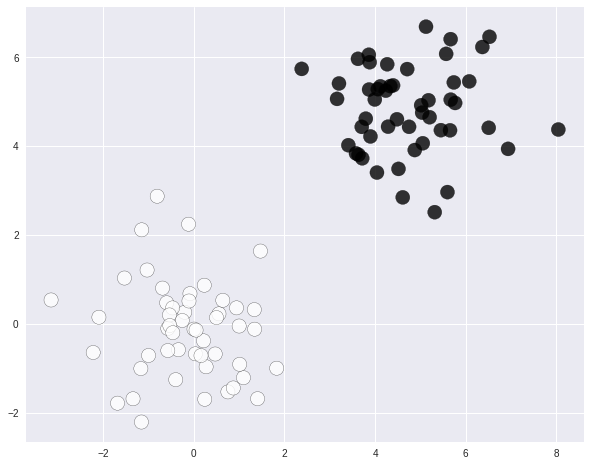

In [ ]:
plt.figure(figsize= (10,8))
plt.grid(True)
plt.scatter(x[:,0], x[:,1] , marker = "o", c = y , s =200
            , edgecolor = "k" , alpha = 0.8)
plt.show()


In [ ]:
newExample = np.array([2.2 , 2.2])
model = KNN(3 , distance_metric = EuclideanDistance)

model.fit(x,y)


In [ ]:
newExample.shape

(2,)

In [ ]:
newExample

array([2.2, 2.2])

In [ ]:
newExample.reshape(1,2)

array([[2.2, 2.2]])

In [ ]:
newExample.shape

(2,)

In [ ]:
model.predict(newExample.reshape(1,2))

(array([0]), array([55, 50, 74]), array([0, 0, 1]))

In [ ]:
predicted_y_label , k_nearest_neighbours_indices , k_nearest_neighbours =model.predict(newExample.reshape(1,2))

In [ ]:
np.random.seed(42)

In [ ]:
w1 = 3
w0 =4
n=100

x = 2*np.random.rand(n,)
y = w0 + w1 * x + np.random.randn(n,)



In [ ]:
x[:5]

array([0.74908024, 1.90142861, 1.46398788, 1.19731697, 0.31203728])

In [ ]:
y.shape

(100,)

In [ ]:
x =x.reshape(-1,1)

In [ ]:
y= y.reshape(-1,1)

In [ ]:
x.shape

(100, 1)

In [ ]:
y.shape

(100, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x , y , test_size = 0.20, random_state = 42 
)


In [ ]:
x_train[:5]

array([0.07188455, 0.31287409, 1.87230955, 1.73414464, 0.17069493])

In [ ]:
y_train[:5]

array([ 5.31443049,  4.46758395, 11.20294546, 10.01529603,  3.29789618])

In [ ]:
for i in range(16):
  regg_model = KNN(i+1 , distance_metric = EuclideanDistance , 
                 task_type ="Regression")

In [ ]:
regg_model.fit(x_train, y_train)

In [ ]:
y_test_predicted = np.zeros_like(y_test)
y_test_predicted



array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
error_list = []
for j in range(x_test.shape[0]):
  y_test_predicted[j],_ = regg_model.predict(x_test[j,:])  
error_list.append(np.sum(np.power(y_test-y_test_predicted , 2)))  

ValueError: ignored

In [ ]:
x = np.array([[-8 ,20] , [-12 , 11], [0 , 26] , [-5 , 5] , [-1 , 22] ,[-7 , 1] ])
y = np.array([0.4 , 0.6 , 0.1 ,1 ,0.8 , -0.3])

In [ ]:
my_model = KNN(k = 1 , task_type = "Regression" )

In [ ]:
my_model.fit(x , y)

In [ ]:
newExample = np.array([-10 , 0])

In [ ]:
my_model.predict(newExample)

(-0.3, array([5]), array([-0.3]))

In [ ]:
x = np.array([3 , -45 , 96 , 56 , -3.9])
y = np.array([33 , -102 , 7 , 0.7 , -10])


In [ ]:
EuclideanDistance(x , y)

123.1474725684616

In [ ]:
def EuclideanDistance(x1 , x2):
  dist = np.sum(np.square(x1 - x2))
  return np.sqrt(dist)

def ManhattanDistance(x1, x2):
  dist = np.sum(np.abs(x1-x2) )
  return dist

  

In [ ]:
ManhattanDistance(x,y)

237.4

In [ ]:
x = np.array([1 , 0 , 1])
y = np.array([2 , 0 , 0])

In [ ]:
ManhattanDistance(x,y)

2

In [ ]:
import numpy as np
from scipy import stats

def EuclideanDistance(x1,x2):
    dist = []
    for row in x1:
        dist.append(np.sum(np.square(row-x2)))
    return np.array(dist)
    
def knn(class1,class2,x_new):
    k=3
    labels = np.concatenate((np.ones(class1.shape[0]) , np.repeat(2, class2.shape[0])))
    dist_1 = EuclideanDistance(class1 , x_new)
    dist_2 = EuclideanDistance(class2 , x_new)
    dist_vec = np.concatenate((dist_1 , dist_2))
    
    k_nearest_neighbours_indices = np.argpartition(dist_vec, k)[:k]
    k_nearest_neighbours = labels[k_nearest_neighbours_indices]
    
    label = stats.mode(k_nearest_neighbours)[0]
    return label

In [ ]:
class1 = np.random.rand(5,2)
class1 = np.array(class1)
class1.shape
class1

array([[0.14707348, 0.92658763],
       [0.49211629, 0.25824439],
       [0.45913576, 0.98003258],
       [0.49261809, 0.32875161],
       [0.63340085, 0.24014562]])

In [ ]:
class2 =np.random.rand(5,2)
class2 = np.array(class2)
class2

array([[0.39224405, 0.43747492],
       [0.90415869, 0.34825547],
       [0.51398949, 0.78365301],
       [0.39654278, 0.6220867 ],
       [0.86236371, 0.94952062]])

In [ ]:
x_new = np.array([2 , 2])

In [ ]:
dist_1 = EuclideanDistance(class1 , x_new)
dist_1

array([4.58555081, 5.30742588, 3.41459617, 5.06527139, 4.96468067])

In [ ]:
dist_2 = EuclideanDistance(class2 , x_new)
dist_2

array([5.02636383, 3.92912817, 3.68772723, 4.46972011, 2.39772325])

In [ ]:
dist_vec = np.concatenate((dist_1 , dist_2))
dist_vec

array([4.58555081, 5.30742588, 3.41459617, 5.06527139, 4.96468067,
       5.02636383, 3.92912817, 3.68772723, 4.46972011, 2.39772325])

In [ ]:
k=3

In [ ]:
k_nearest_neighbours_indices = np.argpartition(dist_vec, k)[:k]
k_nearest_neighbours_indices

array([9, 2, 7])

In [ ]:
labels = np.concatenate((np.ones(class1.shape[0]) , np.repeat(2, class2.shape[0])))


In [ ]:
labels

array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2.])

In [ ]:
k_nearest_neighbours = labels[k_nearest_neighbours_indices]
k_nearest_neighbours 


array([2., 1., 2.])

In [ ]:
label = stats.mode(k_nearest_neighbours)
label[0]


array([2.])